# 1) Resumo

Neste notebook iremos fazer um seleção mais fina das variaveis explicativas. O método aqui utilizado será através da matriz de correlação. As colunas com o módulo da correlação maiores que **0.9** serão excluidas, deixando apenas uma coluna dessa variaveis altamente correlacionadas. A seleção de qual coluna ira ficar é a ordem de comparação apenas. Os coeficientes de correlação foram calculados usando o método padrão de **Pearson**. 

---
# 2) Pre-analise

## 2.1) Importando libs

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)

## 2.2) Minhas Funções

In [20]:
import sys
sys.path.insert(1, "../../")
from src.info import dimensao_dados, variaveis_explicativas, mostra_todas_as_colunas_com,escreve_somente_as_colunas
from src.plota_graficos import plota_matriz_correlacao
from src.selecao_vars import remove_corr_valor_de_corte

---
# 3) Selecionando os dados

## 3.1) Importando os dados

In [21]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_tratados_por_paciente.csv"
path = "../../Dados/Tratados/dados_tratados_por_paciente.csv"
dados = pd.read_csv(path)
dados.head(n=5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.515528,-0.351328,-0.756272,-1.000000,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-1.000000,-0.883669,-0.870968,-0.953536,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.860870,-0.714460,-1.000000,-0.975891,0


## 3.2) Analizando os dados

### Dimensação da matriz atual

In [22]:
dimensao_dados(dados)

Numero de linhas : 351 
Numero de colunas: 121 


### Possiveis variaveis explicativas da base de dados

In [23]:
_ = variaveis_explicativas(dados)

 col[  0] -> AGE_ABOVE65                    col[  1] -> AGE_PERCENTIL                  
 col[  2] -> GENDER                         col[  3] -> DISEASE GROUPING 1             
 col[  4] -> DISEASE GROUPING 2             col[  5] -> DISEASE GROUPING 3             
 col[  6] -> DISEASE GROUPING 4             col[  7] -> DISEASE GROUPING 5             
 col[  8] -> DISEASE GROUPING 6             col[  9] -> HTN                            
 col[ 10] -> IMMUNOCOMPROMISED              col[ 11] -> OTHER                          
 col[ 12] -> ALBUMIN_MEDIAN                 col[ 13] -> ALBUMIN_MEAN                   
 col[ 14] -> ALBUMIN_MIN                    col[ 15] -> ALBUMIN_MAX                    
 col[ 16] -> BE_VENOUS_MEDIAN               col[ 17] -> BE_VENOUS_MEAN                 
 col[ 18] -> BE_VENOUS_MIN                  col[ 19] -> BE_VENOUS_MAX                  
 col[ 20] -> BLAST_MEDIAN                   col[ 21] -> BLAST_MEAN                     
 col[ 22] -> BLAST_MIN          

## 3.3)  Matriz de Correlação

In [24]:
matriz_corr = dados.iloc[:,:-1].corr().abs()
matriz_corr.head(n=10)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL
AGE_ABOVE65,1.000000,0.874687,0.029841,0.286508,0.050972,0.165299,0.032275,0.313978,0.009293,0.335941,...,0.133712,0.002652,0.003712,0.043829,0.011517,0.033734,0.020932,0.007714,0.003837,0.034106
AGE_PERCENTIL,0.874687,1.000000,0.053109,0.302582,0.057553,0.133116,0.013922,0.334422,0.045804,0.328727,...,0.139455,0.010333,0.001396,0.029530,0.016741,0.030959,0.037437,0.012486,0.005399,0.032385
GENDER,0.029841,0.053109,1.000000,0.028176,0.002127,0.065530,0.070150,0.020690,0.031159,0.019801,...,0.103040,0.006446,0.025511,0.032169,0.042625,0.028108,0.005215,0.024874,0.031734,0.027365
DISEASE GROUPING 1,0.286508,0.302582,0.028176,1.000000,0.192547,0.271899,0.015883,0.332639,0.187614,0.496748,...,0.006411,0.005622,0.000257,0.114158,0.003616,0.035530,0.013522,0.004099,0.002569,0.036798
DISEASE GROUPING 2,0.050972,0.057553,0.002127,0.192547,1.000000,0.084270,0.114763,0.112739,0.033376,0.116600,...,0.005424,0.026989,0.011481,0.002483,0.013343,0.032637,0.047747,0.001245,0.015424,0.032616
DISEASE GROUPING 3,0.165299,0.133116,0.065530,0.271899,0.084270,1.000000,0.308800,0.293017,0.262946,0.465959,...,0.109951,0.015156,0.012054,0.017156,0.034846,0.007099,0.022276,0.005435,0.033030,0.005576
DISEASE GROUPING 4,0.032275,0.013922,0.070150,0.015883,0.114763,0.308800,1.000000,0.128163,0.164226,0.134550,...,0.010396,0.047068,0.034231,0.027601,0.000463,0.009252,0.044475,0.034502,0.002428,0.010201
DISEASE GROUPING 5,0.313978,0.334422,0.020690,0.332639,0.112739,0.293017,0.128163,1.000000,0.120473,0.453608,...,0.001611,0.035575,0.070951,0.014458,0.061686,0.090996,0.033720,0.074654,0.069939,0.090109
DISEASE GROUPING 6,0.009293,0.045804,0.031159,0.187614,0.033376,0.262946,0.164226,0.120473,1.000000,0.201224,...,0.019606,0.011543,0.040767,0.032597,0.050204,0.082756,0.006031,0.039073,0.046738,0.085311
HTN,0.335941,0.328727,0.019801,0.496748,0.116600,0.465959,0.134550,0.453608,0.201224,1.000000,...,0.014293,0.087527,0.085239,0.147106,0.047385,0.091938,0.091265,0.071135,0.036919,0.091473


### Matriz de correlação com correlações sem tratamento

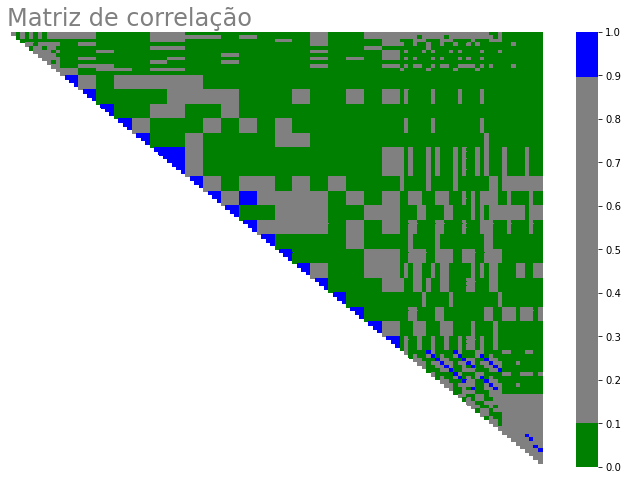

In [25]:
plota_matriz_correlacao(dados, matriz='upper')

> Retirando as colunas com os valore de correlação maiores que **0.9** (metodo de pearson). A cor **azul** são valores entre **[0.9 e 1.0]**. A cor **cinza** são valores entre **[0.1 e 0.8]**. A cor verde são valores entre **[0 e 0.1]**.

In [26]:
dados_sem_corr_acima_do_valor_de_corte, colunas_exluidas = remove_corr_valor_de_corte(dados, 0.90)
print(f'{len(colunas_exluidas)} a coluna exluidas foram')

79 a coluna exluidas foram


In [27]:
colunas_exluidas

['ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'FFA_MEAN',
 'FFA_MIN',
 'FFA_MAX',
 'GGT_MEAN',
 'GGT_MIN',
 'GGT_MAX',
 'HEMATOCRITE_MEAN',
 'HEMATOCRITE_MIN',
 'HEMATOCRITE_MAX',
 'HEMOGLOBIN_MEDIAN',
 'HEMOGLOBIN_MEAN',
 'HEMOGLOBIN_MIN',
 'HEMOGLOBIN_MAX',
 'LACTATE_MEAN',
 'LACTATE_MIN',
 'LACTATE_MAX',
 'LEUKOCYTES_MEAN',
 'LEUKOCYTES_MIN',
 'LEUKOCYTES_MAX',
 'LINFOCITOS_MEAN',
 'LINFOCITOS_MIN',
 'LINFOCITOS_MAX',
 'NEUTROPHILES_MEDIAN',
 'NEUTROPHILES_MEAN',
 'NEUTROPHILES_MIN',
 'NEUTROPHILES_MAX',
 'P02_VENOUS_MEAN',
 'P02_VENOUS_MIN',
 'P02_VENOUS_MAX',
 'PCR_MEAN',
 'PCR_MIN',
 'PCR_MAX',
 'PLATELETS_MEAN',
 'PLATELETS_MIN',
 'PLATELETS_MAX',
 'POTASSIUM_MEAN',
 'POTASSIUM_MIN',
 'POTASSIUM_MAX',
 'SAT02_ARTERIAL_MEAN',
 'SAT02_ARTERIAL_MIN',
 'SAT02_ARTERIAL_MAX',
 'SAT02_VENOUS_MEAN',
 'SAT02_VENOUS_MIN',
 'SAT02_VENOUS_MAX',
 'SODIUM_MEAN',
 'SODIUM_MIN',
 'SODIUM_MAX',


In [28]:
dados_sem_corr_acima_do_valor_de_corte.head(n=10)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.593220,-0.285714,0.736842,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.645951,0.357143,0.935673,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,-0.285714,0.684211,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.593220,0.285714,0.868421,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.525424,-0.196429,0.815789,-0.247863,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,0
5,1,0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.593220,0.178571,0.894737,-0.452991,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
6,0,-0.777778,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.389831,-0.285714,0.842105,-0.179487,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
7,0,-0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.593220,0.464286,0.789474,-0.435897,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
8,1,0.555556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.661017,-0.321429,0.842105,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
9,1,0.555556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.661017,0.107143,0.789474,-0.128205,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


### Matriz de correlação com correlações menores que 0.9

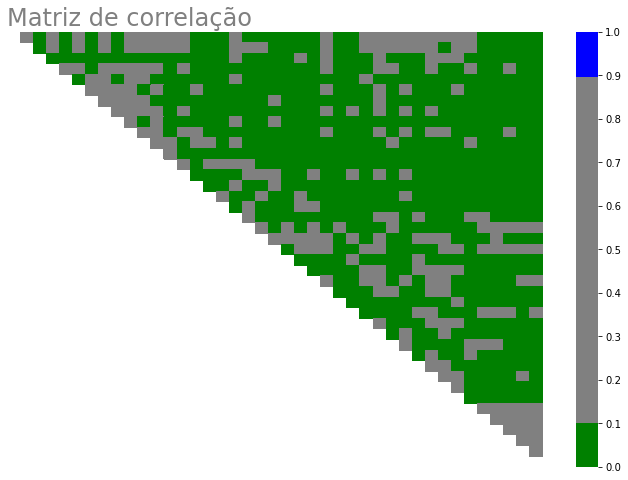

In [29]:
plota_matriz_correlacao(dados_sem_corr_acima_do_valor_de_corte, matriz='upper')

> Agora pode-se oberserva que as correlações entre as variaveis são sem abaixo de 0.9.

In [30]:
dimensao_dados(dados_sem_corr_acima_do_valor_de_corte)

Numero de linhas : 351 
Numero de colunas: 42 


### lista das variaveis explicativa com baixa correlação

In [31]:
_ = variaveis_explicativas(dados_sem_corr_acima_do_valor_de_corte)

 col[  0] -> AGE_ABOVE65                    col[  1] -> AGE_PERCENTIL                  
 col[  2] -> GENDER                         col[  3] -> DISEASE GROUPING 1             
 col[  4] -> DISEASE GROUPING 2             col[  5] -> DISEASE GROUPING 3             
 col[  6] -> DISEASE GROUPING 4             col[  7] -> DISEASE GROUPING 5             
 col[  8] -> DISEASE GROUPING 6             col[  9] -> HTN                            
 col[ 10] -> IMMUNOCOMPROMISED              col[ 11] -> OTHER                          
 col[ 12] -> ALBUMIN_MEDIAN                 col[ 13] -> BE_VENOUS_MEDIAN               
 col[ 14] -> BLAST_MEDIAN                   col[ 15] -> FFA_MEDIAN                     
 col[ 16] -> GGT_MEDIAN                     col[ 17] -> HEMATOCRITE_MEDIAN             
 col[ 18] -> LACTATE_MEDIAN                 col[ 19] -> LEUKOCYTES_MEDIAN              
 col[ 20] -> LINFOCITOS_MEDIAN              col[ 21] -> P02_VENOUS_MEDIAN              
 col[ 22] -> PCR_MEDIAN         

> Os dados finais tem **41** variaveis explicativas selecionadas.

# 4) Salvando os dados

In [32]:
path_out = '../../Dados/Tratados/'
dados_sem_corr_acima_do_valor_de_corte.to_csv(path_out+'dados_sem_corr_acima_do_valor_de_corte.csv'
                                              , index_label=False)

In [33]:
escreve_somente_as_colunas(dados_sem_corr_acima_do_valor_de_corte
                           ,path_out+'dados_sem_corr_acima_do_valor_de_corte_colunas.csv')

---
Navegação:

[Exploração e limpeza de dados](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Exploratorios/explaracao_limpezada.ipynb)

[Retornar para README principal](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final)

---